In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Autocorrelate Function

In [127]:
def autocorrelate(syg, tau=0):
    N = len(syg)

    syg_2 = np.zeros(3*N-2, dtype = 'float')
    syg_2[N-1:2*N-1] = np.copy(syg)

    syg_1 = np.zeros(3*N-2, dtype='float')
    syg_1[N+tau:tau+2*N] = syg
    
    return np.sum(np.dot(syg_1, syg_2))

def auto_corr_for_tau(syg, low=-10, high=10, normed=True):
    tau = np.arange(low, high)

    f_corr = np.zeros(len(tau))
    norm = autocorrelate(syg)
    print(norm)
    for index, t in enumerate(tau):
        f_corr[index] = autocorrelate(syg, t)

    if normed:
        f_corr /= norm

    return tau, f_corr

In [86]:
t = np.arange(0, 2, 1/32)
x = np.sin(2 * np.pi * 1 * t)

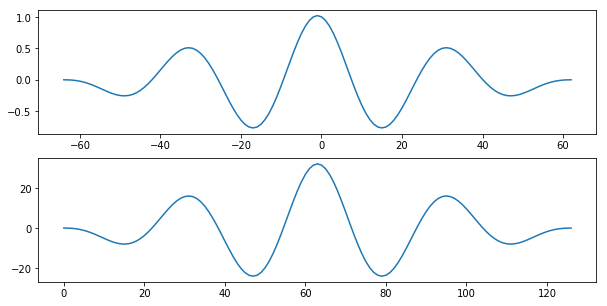

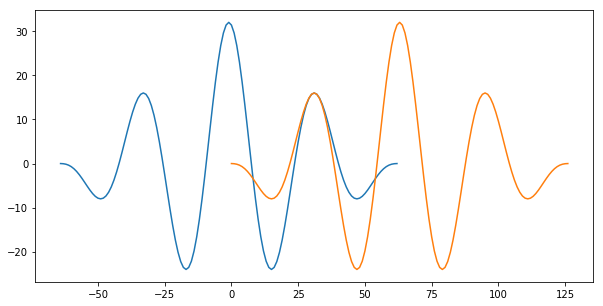

In [87]:
plt.figure(figsize=((10,5)))

plt.subplot(2,1,1)
plt.plot(*auto_corr_for_tau(x, -len(x), len(x)-1))

plt.subplot(2,1,2)
plt.plot(np.correlate(x, x, 'full'))
plt.show()

plt.figure(figsize=((10,5)))
plt.plot(*auto_corr_for_tau(x, -len(x), len(x)-1, normed=False))
plt.plot(np.correlate(x, x, 'full'))
plt.show()

# Read Signal

In [103]:
from obci_readmanager.signal_processing.read_manager import ReadManager
from pprint import pprint
def read_signals(filename):
    TMSI_OFFSET = 0.0715

    # Initialize the ReadManager
    mgr = ReadManager(filename + ".xml", filename + ".raw", filename + ".tag")
    
    o1 = mgr.get_channels_samples(['O1']) * TMSI_OFFSET
    return o1

In [104]:
o1 = read_signals('./cw1_otwarte')

2018-10-09 13:25:43,168 - tags_file_reader - ERROR - Couldn`t open tags file.
2018-10-09 13:25:43,169 - data_source - INFO - All data set requested for the first time. Start reading all data from the file...


In [105]:
_o = o1[10000: 20000]

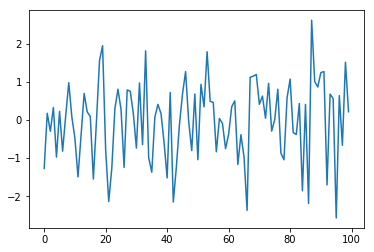

-2.439503677460298


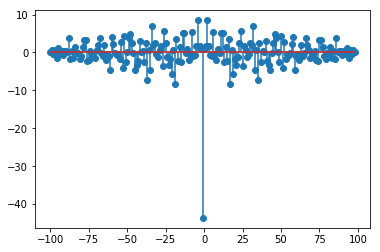

In [133]:
np.random.seed(10000)
x = np.random.normal(size=100)
plt.plot(x)
plt.show()

plt.stem(*auto_corr_for_tau(x, -len(x), len(x)-1), normed=False)
plt.show()

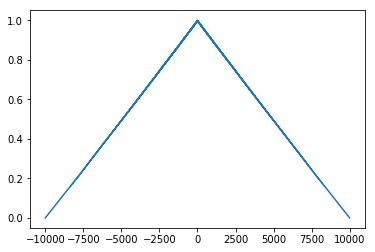

In [107]:
plt.plot(*auto_corr_for_tau(_o, -len(_o), len(_o)-1))
plt.show()